In [1]:
import pandas as pd

# Import the csv file dataset

In [2]:
df=df = pd.read_csv('D:\\MOVIESSS\\my\\my\\data science\\time_series_tem.csv')

In [3]:
df

,Unnamed: 0,Date,Temperature
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9
2,2,1981-01-03,18.8
3,3,1981-01-04,14.6
4,4,1981-01-05,15.8
...,...,...,...
3645,3645,1990-12-27,14.0
3646,3646,1990-12-28,13.6
3647,3647,1990-12-29,13.5
3648,3648,1990-12-30,15.7


In [4]:
df.drop('Unnamed: 0',axis =1, inplace = True)

In [5]:
df

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [6]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# Import the models

In [7]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

# Check the stationary wave

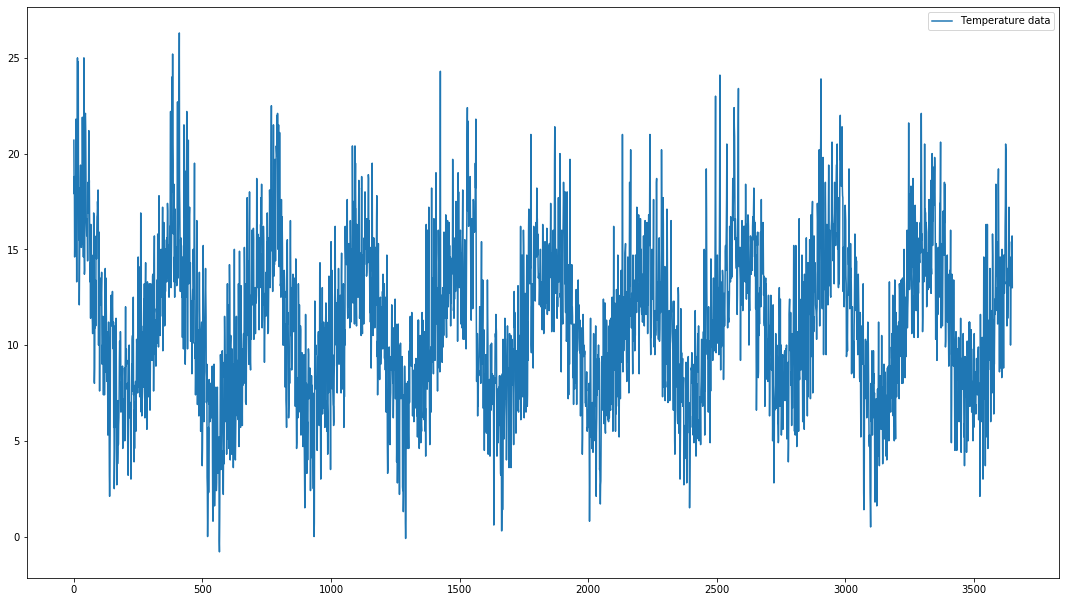

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df['Temperature'].values, label = "Temperature data")
plt.legend()

In [9]:
pValue = adfuller(df["Temperature"].values)[1]

In [10]:
pValue

0.00024513360704154623

In [11]:
def isSeriesStationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True

In [12]:
isSeriesStationary(df["Temperature"].values)

True

# If series is not stationary then how to make it stationary?

In [13]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

In [14]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [15]:
totalData = len(df["Temperature"].values)

In [16]:
totalData

3650

# Train the dataset

In [17]:
trainSplit = int(totalData * (0.7))

In [18]:
trainSplit

2555

In [19]:
trainSet = df["Temperature"].values[:2555]

In [20]:
trainSet

array([20.7, 17.9, 18.8, ..., 14.3, 13.3, 16.7])

In [21]:
testSet = df["Temperature"].values[2555:]

In [22]:
testSet

array([15.3, 14.3, 13.5, ..., 13.5, 15.7, 13. ])

In [23]:
differencedTrainSet = difference(trainSet, 365)

In [24]:
model = ARIMA(differencedTrainSet, order=(7,0,1))

In [25]:
model_fit = model.fit(disp = 0)
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))


In [26]:
forecast

array([-0.49620399, -0.16501941, -0.00257316, ..., -0.11359782,
       -0.11359782, -0.11359782])

# Prediction of the temperature

In [27]:
yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 365)
    yPrediction.append(yPredict)
    history.append(yPredict)

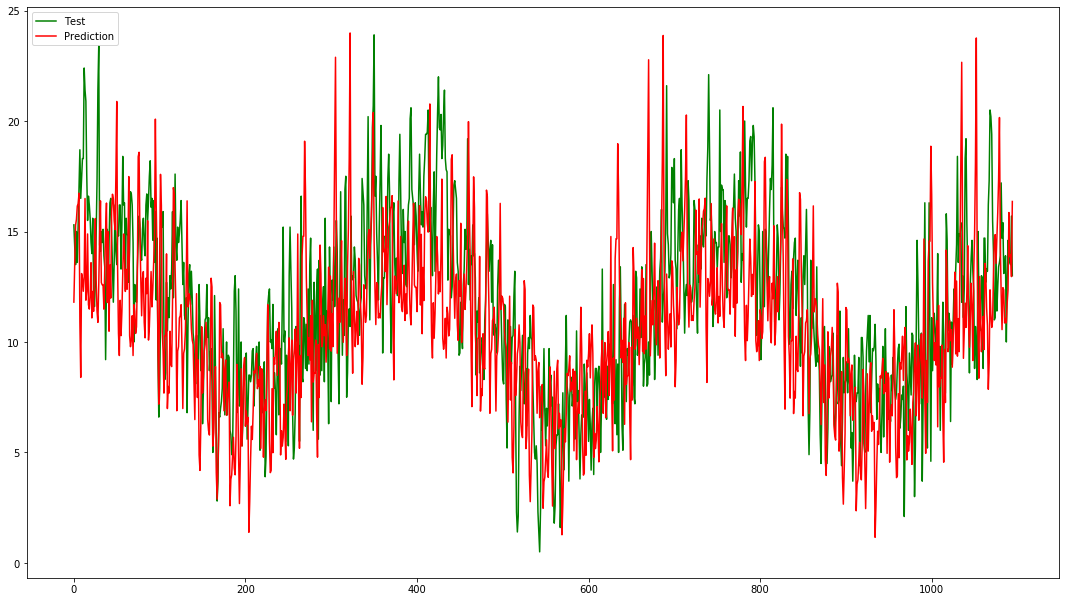

In [28]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(testSet, color='green', label = "Test")
plt.plot(yPrediction[:-1], color='red', label = "Prediction")
plt.legend()
plt.savefig("TemperaturePrediction.png")